In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn import metrics

#Read data from the spreadsheet
data = pd.read_csv("cleaned_mlready_combinedData1.csv")

In [3]:
# check out fire and no fire ratio
data["Fire"].value_counts()
data.dropna()
data.shape

(7271, 15)

In [4]:
## Set up the label variable as y
y = data['Fire']

## Dropping feature 'label'
X = data.drop(columns = 'Fire')

In [5]:
# Scale the set
X_scaled = scale(X)

In [6]:
# Split the set into randomized training and test feature/label sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.6, train_size = 0.4 ,random_state = 4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2908, 14)
(4363, 14)
(2908,)
(4363,)


In [7]:
# RBF Kernel, C=1, default value of gamma

# Create Model
rbfKernelModel = SVC(C=100, gamma=50, kernel='rbf')
# Train Model
rbfKernelModel.fit(X_train, y_train)
# Create label prediction
labelPrediction = rbfKernelModel.predict(X_test)

#Print accuracy and confusion matrix
print("Accuracy RBF:", metrics.accuracy_score(y_true=y_test, y_pred=labelPrediction), "\n")

Accuracy RBF: 0.9841851936740774 



In [8]:
#baseline predictions, amd confusion matrix of the baseline model
prediction_base = rbfKernelModel.predict(X_test)
confusion_matrix(y_test, prediction_base, labels=[0,1])

#Get report on base model
print(classification_report(y_test,prediction_base))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4294
           1       0.00      0.00      0.00        69

    accuracy                           0.98      4363
   macro avg       0.49      0.50      0.50      4363
weighted avg       0.97      0.98      0.98      4363



C:\Users\Josh\Desktop\Class\Comp 542\Comp 542 Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Josh\Desktop\Class\Comp 542\Comp 542 Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Josh\Desktop\Class\Comp 542\Comp 542 Project\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [11]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_scaled, y)

# Split the set into randomized training and test feature/label sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, train_size = 0.7 ,random_state = 10)

# Create Model
rbfKernelResampledModel = SVC(kernel='rbf')
# Train Model
rbfKernelResampledModel.fit(X_train, y_train)
# Create label prediction
labelPredictionResampled = rbfKernelResampledModel.predict(X_test)

In [12]:
#Print accuracy and confusion matrix
print("Accuracy RBF Resampled:", metrics.accuracy_score(y_true=y_test, y_pred=labelPredictionResampled), "\n")

#baseline predictions, amd confusion matrix of the baseline model
prediction_base_rbf = rbfKernelResampledModel.predict(X_test)
confusion_matrix(y_test, prediction_base_rbf, labels=[0,1])

#Get report on base model
print(classification_report(y_test,prediction_base_rbf))

Accuracy RBF Resampled: 0.8595714951094551 

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2169
           1       0.79      0.98      0.87      2125

    accuracy                           0.86      4294
   macro avg       0.88      0.86      0.86      4294
weighted avg       0.88      0.86      0.86      4294



In [13]:
X_resampled, y_resampled = ADASYN().fit_resample(X_scaled, y)

# Split the set into randomized training and test feature/label sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, train_size = 0.7 ,random_state = 10)

# Create Model
rbfKernelResampledModel = SVC(kernel='rbf')
# Train Model
rbfKernelResampledModel.fit(X_train, y_train)
# Create label prediction
labelPredictionResampled = rbfKernelResampledModel.predict(X_test)

In [14]:
#Print accuracy and confusion matrix
print("Accuracy RBF Resampled:", metrics.accuracy_score(y_true=y_test, y_pred=labelPredictionResampled), "\n")

#baseline predictions, amd confusion matrix of the baseline model
prediction_base_rbf = rbfKernelResampledModel.predict(X_test)
confusion_matrix(y_test, prediction_base_rbf, labels=[0,1])

#Get report on base model
print(classification_report(y_test,prediction_base_rbf))

Accuracy RBF Resampled: 0.8603351955307262 

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2145
           1       0.79      0.98      0.88      2151

    accuracy                           0.86      4296
   macro avg       0.88      0.86      0.86      4296
weighted avg       0.88      0.86      0.86      4296



In [16]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Hyper parameter tuning for RBF Kernel SVM

# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

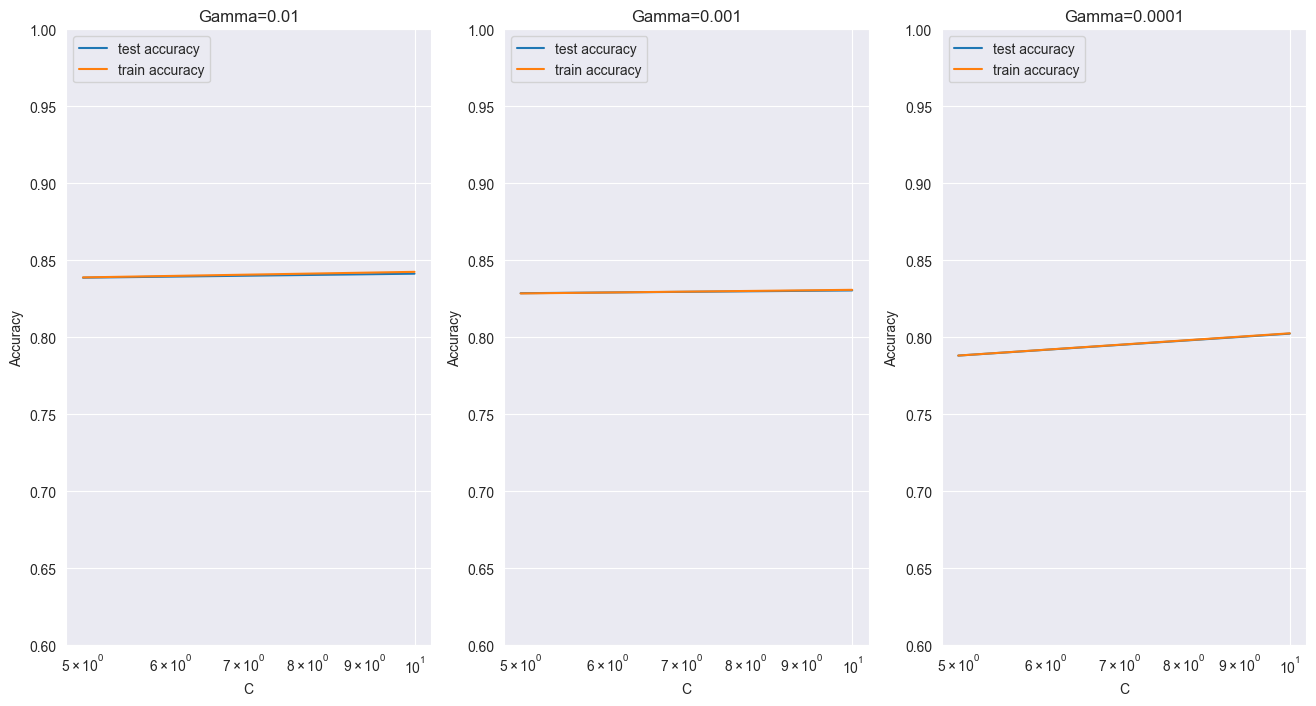

In [17]:
import matplotlib.pyplot as plt

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [18]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8413339903733679 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [23]:
# Create Model with optimal parameters
rbfKernelResampledModel = SVC(kernel='rbf')
# Train Model
rbfKernelResampledModel.fit(X_train, y_train)
# Create label prediction
labelPredictionResampled = rbfKernelResampledModel.predict(X_test)

#Print accuracy and confusion matrix
print("Accuracy RBF Resampled:", metrics.accuracy_score(y_true=y_test, y_pred=labelPredictionResampled), "\n")

#baseline predictions, amd confusion matrix of the baseline model
prediction_base_rbf = rbfKernelResampledModel.predict(X_test)
confusion_matrix(y_test, prediction_base_rbf, labels=[0,1])

#Get report on base model
print(classification_report(y_test,prediction_base_rbf))

Accuracy RBF Resampled: 0.8603351955307262 

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2145
           1       0.79      0.98      0.88      2151

    accuracy                           0.86      4296
   macro avg       0.88      0.86      0.86      4296
weighted avg       0.88      0.86      0.86      4296

